In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from wordsegment import load, segment
from textblob import TextBlob, Word

In [72]:
nltk.download("averaged_perceptron_tagger_eng")
nltk.download("averaged_perceptron_tagger")   
nltk.download("wordnet")
nltk.download("stopwords")

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [58]:
df = pd.read_csv("data/twiteer_data.csv", encoding='latin1', header= None)
df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [59]:
df.columns = ['target','ids', 'date', 'flag', 'Users', 'text']
df.head()

,target,ids,date,flag,Users,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [60]:
df

,target,ids,date,flag,Users,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [61]:
df.isnull().sum()

target    0
ids       0
date      0
flag      0
Users     0
text      0
dtype: int64

In [62]:
print(df["target"].value_counts())

target
0    800000
4    800000
Name: count, dtype: int64


In [63]:
df['target'] = df['target'].replace(4,1)
df

,target,ids,date,flag,Users,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,1,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,1,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,1,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,1,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [64]:
df = df[["target", "text"]]

In [65]:
import re

def contains_emoji(s):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags
                           "]+", flags=re.UNICODE)
    return bool(emoji_pattern.search(s))

print(df["text"].apply(contains_emoji).value_counts())

text
False    1600000
Name: count, dtype: int64


In [66]:
df.head()

,target,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [69]:
stop_words = set(stopwords.words("english"))
print(stop_words)

{'again', 'nor', 'hasn', 'how', 'yours', 'to', 'so', 'are', 'whom', 'out', 'wasn', 'did', 'for', 'by', 'own', 'no', 'him', 'we', "doesn't", 'aren', 'wouldn', 'their', 'shouldn', 'more', 'am', 'herself', 'when', "it's", 'they', "she's", 'who', 'me', "you've", 'most', 'after', 'each', "should've", 'd', 'between', "won't", 'where', "isn't", 'some', 'themselves', 'an', 'was', 'until', 'same', 'being', "shan't", 'his', 'under', 'her', 'o', 'himself', 'y', 'than', "hasn't", 'while', 'ourselves', 'there', 'up', "didn't", 'mustn', 'them', "haven't", 'of', 'then', 'ours', 's', 'the', 'myself', 'because', "aren't", 'couldn', 'shan', 'won', 'have', 'itself', 'just', "you'd", 'he', 'having', 'all', "mightn't", 'you', 'down', 'ma', 'as', 'on', 'my', 'now', 'been', 'during', 'into', 'she', 'its', 'over', 'and', 'these', 'here', 'or', "hadn't", 're', 'haven', 'a', 'further', 've', 'very', 'off', 'in', 'yourself', 'it', 'about', 'through', "wouldn't", "wasn't", 'should', "mustn't", 'mightn', 'any', 'd

In [80]:
stop_words = set(stopwords.words("english"))

load()

tk = TweetTokenizer(reduce_len=True, strip_handles=True)

# Slang dictionary
slang_map = {
    "u": "you", "r": "are", "idk": "i_do_not_know", "smh": "shaking_my_head",
    "imo": "in_my_opinion", "pls": "please", "plz": "please", "ur": "your"
}


def normalize_repeated_chars(text):
    return re.sub(r"(.)\1{2,}", r"\1", text)

# 2. Negation handling
def handle_negations(text):
    return re.sub(r"\bnot\s+(\w+)", r"not_\1", text)

# 3. Hashtag splitter
def split_hashtag(token):
    if token.startswith("#"):
        return " ".join(segment(token[1:]))
    return token

def preprocess_tweet(text: str) -> str:
    # Lowercase
    text = text.lower()

    # URL & numbers
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)
    text = re.sub(r"\d+", "", text)
    
    # punctination
    text = re.sub(r"([!?])\1+", r"\1", text)

    # Negation handling
    text = handle_negations(text)

    # Tokenization
    tokens = tk.tokenize(text)

    cleaned = []
    for w in tokens:
        w = normalize_repeated_chars(w)       # loveee → love
        w = split_hashtag(w)                  # #BestDayEver → best day ever
        if w in slang_map: 
            w = slang_map[w]                  # slang conversion
        if w not in stop_words and re.match(r"\w+", w):  
            cleaned.append(Word(w).lemmatize())

    return " ".join(cleaned)

In [99]:
tweet = "@switchfoot http://twitpic.com/2y1zl - Awww, "
print(preprocess_tweet(tweet))

In [82]:
df['clean_text'] = df['text'].apply(preprocess_tweet)

C:\Users\Admin\AppData\Local\Temp\ipykernel_16744\4237644812.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_text'] = df['text'].apply(preprocess_tweet)


In [98]:
df.head()

,target,text,clean_text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",that's bummer shoulda got david carr third day
1,0,is upset that he can't update his Facebook by ...,upset can't update facebook texting might cry ...
2,0,@Kenichan I dived many times for the ball. Man...,dived many time ball managed save rest go bound
3,0,my whole body feels itchy and like its on fire,whole body feel itchy like fire
4,0,"@nationwideclass no, it's not behaving at all....",not_behaving mad can't see


In [100]:
from sklearn.model_selection import train_test_split

X = df["clean_text"]
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [101]:
X.head()

0       that's bummer shoulda got david carr third day
1    upset can't update facebook texting might cry ...
2      dived many time ball managed save rest go bound
3                      whole body feel itchy like fire
4                           not_behaving mad can't see
Name: clean_text, dtype: object

In [102]:
from collections import Counter

def get_rare_words(corpus, min_freq=2):
    all_words = " ".join(corpus).split()
    word_freq = Counter(all_words)
    rare_words = {w for w, c in word_freq.items() if c < min_freq}
    print(f"{len(rare_words)} rare words found (freq < {min_freq})")
    return rare_words

In [103]:
rare_words = get_rare_words(X_train, min_freq=2)

152940 rare words found (freq < 2)


In [104]:
def remove_rare_words(corpus, rare_words):
   
    cleaned_corpus = corpus.apply(
        lambda x: " ".join([w for w in x.split() if w not in rare_words])
    )
    return cleaned_corpus

In [105]:
X_train = remove_rare_words(X_train, rare_words)
X_test  = remove_rare_words(X_test, rare_words)


=== Count + Naive Bayes ===
Accuracy: 0.7738
              precision    recall  f1-score   support

           0       0.77      0.78      0.78    160000
           1       0.78      0.77      0.77    160000

    accuracy                           0.77    320000
   macro avg       0.77      0.77      0.77    320000
weighted avg       0.77      0.77      0.77    320000



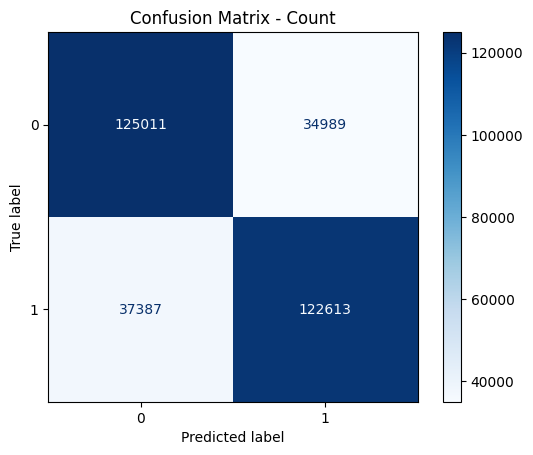


=== TF-IDF + Naive Bayes ===
Accuracy: 0.7680
              precision    recall  f1-score   support

           0       0.76      0.77      0.77    160000
           1       0.77      0.76      0.77    160000

    accuracy                           0.77    320000
   macro avg       0.77      0.77      0.77    320000
weighted avg       0.77      0.77      0.77    320000



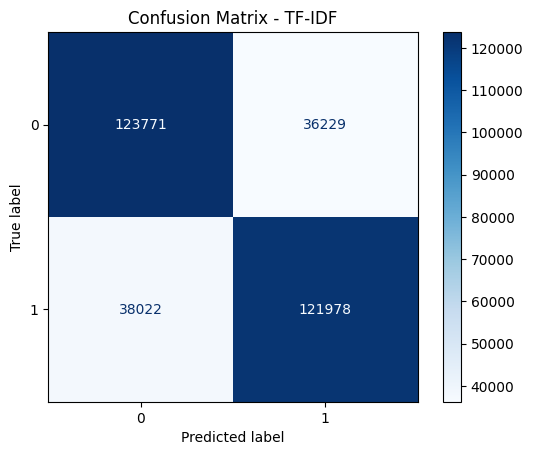


>>> vectors: Count (Accuracy = 0.7738)


In [107]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Dictionary 
results = {}

for vect_name, vect in [("Count", CountVectorizer()), ("TF-IDF", TfidfVectorizer())]:
    pipe = Pipeline([
        ("vectorizer", vect),
        ("nb", MultinomialNB())
    ])
    
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    
    results[vect_name] = (pipe, acc, y_pred)
    
    print(f"\n=== {vect_name} + Naive Bayes ===")
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    
    ConfusionMatrixDisplay.from_estimator(pipe, X_test, y_test, cmap="Blues")
    plt.title(f"Confusion Matrix - {vect_name}")
    plt.show()

# Select the best one
best_vect_name = max(results, key=lambda k: results[k][1])
print(f"\n>>> vectors: {best_vect_name} (Accuracy = {results[best_vect_name][1]:.4f})")

In [108]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np


chosen_vect = CountVectorizer() if best_vect_name == "Count" else TfidfVectorizer()

pipe = Pipeline([
    ("vectorizer", chosen_vect),
    ("nb", MultinomialNB())
])

param_dist = {
    "vectorizer__ngram_range": [(1,1), (1,2)],
    "vectorizer__min_df": [1, 2, 5],
    "vectorizer__max_df": [0.9, 0.95, 1.0],
    "nb__alpha": np.logspace(-2, 2, 30),  # 0.01 → 100
    "nb__fit_prior": [True, False]
}

rand_search = RandomizedSearchCV(
    pipe,
    param_distributions=param_dist,
    n_iter=25,
    scoring="accuracy",
    cv=3,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

rand_search.fit(X_train, y_train)

print("\n=== Fine Tuning Results ===")
print("Best Params:", rand_search.best_params_)
print(f"Best CV Score: {rand_search.best_score_:.4f}")

Fitting 3 folds for each of 25 candidates, totalling 75 fits



=== Fine Tuning Results ===
Best Params: {'vectorizer__ngram_range': (1, 2), 'vectorizer__min_df': 5, 'vectorizer__max_df': 0.95, 'nb__fit_prior': True, 'nb__alpha': np.float64(5.736152510448681)}
Best CV Score: 0.7811


In [109]:
import joblib

joblib.dump(rand_search.best_estimator_, "model/sentiment_model.pkl")
print("✅ Model saved to model/sentiment_model.pkl")


✅ Model saved to model/sentiment_model.pkl
